**1. Import necessary modules**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**2. Load the dataset**

In [ ]:
data = pd.read_csv('/content/drive/Othercomputers/MyLaptop/ML_CCFD/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The dataset comprises :

**Time:** The time of the transaction.

**Amount:** The amount of the transaction.

**V1 to V28:** 28 anonymized features representing various attributes of the transaction.

**Class:**The target variable where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.

**3. Data Preprocessing**

**A) Data Cleaning**

In [ ]:
if data.isnull().values.any():
    print("Warning: Dataset contains missing values")
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


The dataset was checked for missing values, and none were found.

**B) Visualize Class Distribution**

<ipython-input-6-97d76d7bb618>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort=True)


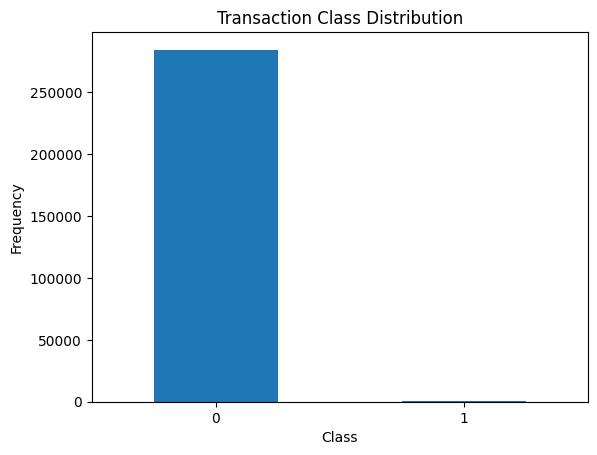

In [ ]:
count_classes = pd.value_counts(data['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The class distribution shows a significant imbalance: the majority of transactions are non-fraudulent (Class 0), while fraudulent transactions (Class 1) are rare.



**C) Data Transformation**

<ipython-input-25-9b484b94525e>:14: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes_res = pd.value_counts(y_res, sort=True)


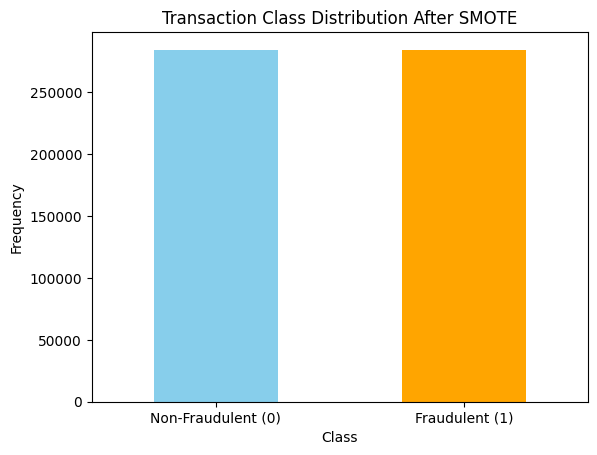

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Define features (X) and target (Y)
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Plot class distribution after SMOTE
count_classes_res = pd.value_counts(y_res, sort=True)
count_classes_res.plot(kind='bar', rot=0, color=['skyblue', 'orange'])
plt.title("Transaction Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["Non-Fraudulent (0)", "Fraudulent (1)"])
plt.show()

# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




*   The **features and target variable are separated**, with the target being the class label.
*   **SMOTE** (Synthetic Minority Over-sampling Technique) was applied to **balance the dataset**. After balancing, both classes have an equal number of samples, improving the reliability of the model.
*   The data was split into **80% training and 20% testing sets**. This split allows for training the model on one portion of the data while evaluating its performance on unseen data.
*   **Feature standardization** is performed to normalize the data, ensuring all features have a mean of zero and a standard deviation of one so that all features contribute equally to the model training.







**4.Training and Evaluating the model**

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, precision_score

# Define models
models = {
    "XGBoost": XGBClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

best_model = None
best_accuracy = 0

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get probabilities for ROC AUC score (if supported)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = y_pred  # Fallback for models without predict_proba

    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)

    print(f"Model: {model_name}")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"ROC AUC Score: {auc_score:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")
    print("\n" + "-"*60 + "\n")

    # Keep track of the best model
    if accuracy > best_accuracy:
        best_model = model
        best_accuracy = accuracy

# Display the best model details
y_pred = best_model.predict(X_test)
print("Best Model:", type(best_model).__name__)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))


Model: XGBoost
Accuracy Score: 0.9999
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56735    15]
 [    0 56976]]


------------------------------------------------------------

Model: Random Forest
Accuracy Score: 0.9999
ROC AUC Score: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[56739    11]
 [    0 56976]]


----------

*   Initializes an **XGBoost, Random Forest, MLP and Decision tree classifier** with a fixed random state.
*   Trains the model using training data.
*   Makes predictions on the test dataset.
*   Computes accuracy and classification metrics.





**5.Confusion Matrix Visualization**

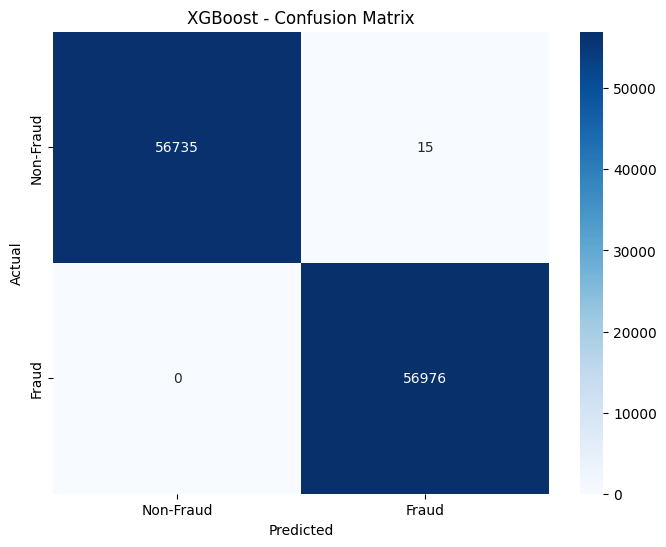

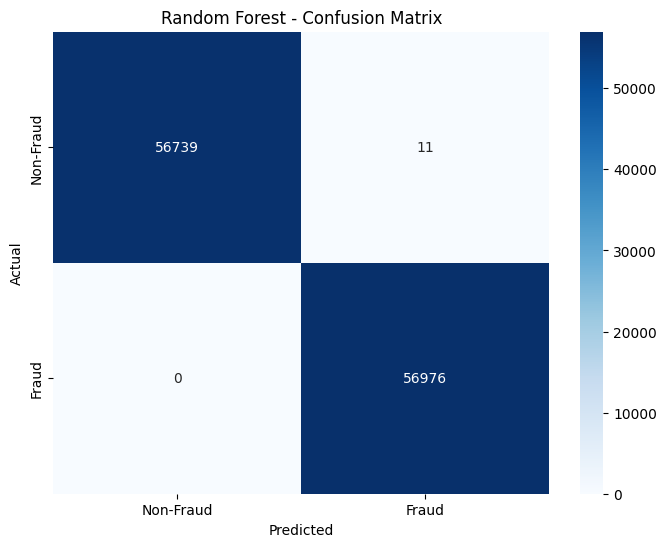

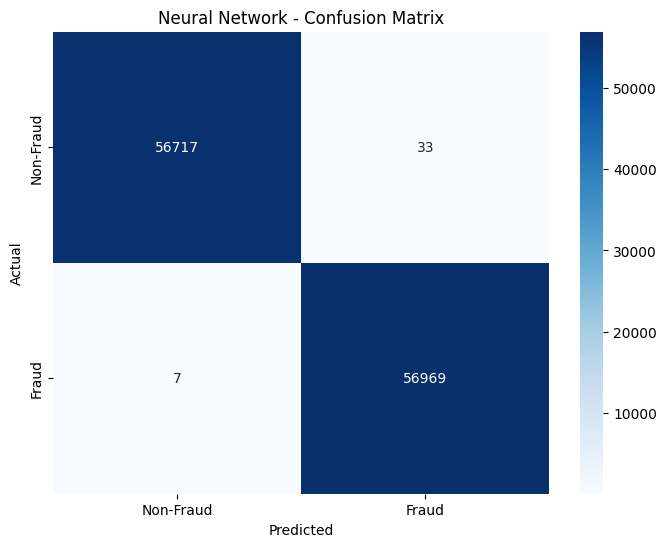

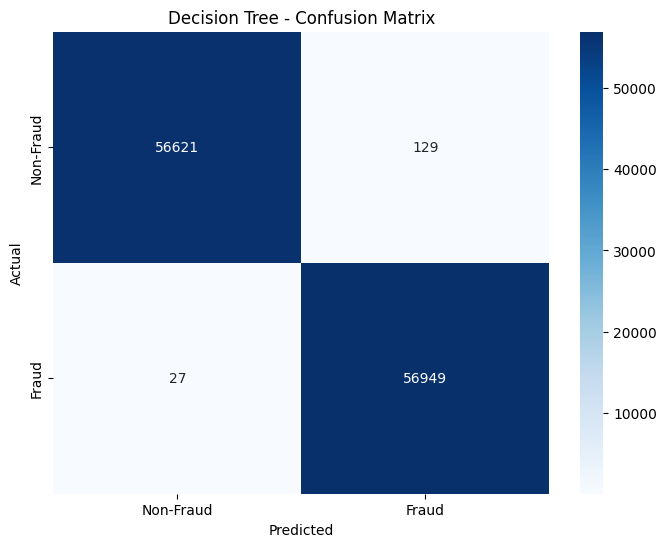

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Fit the model to the training data
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, model_name)


Confusion matrix is plotted for all 4 classifiers



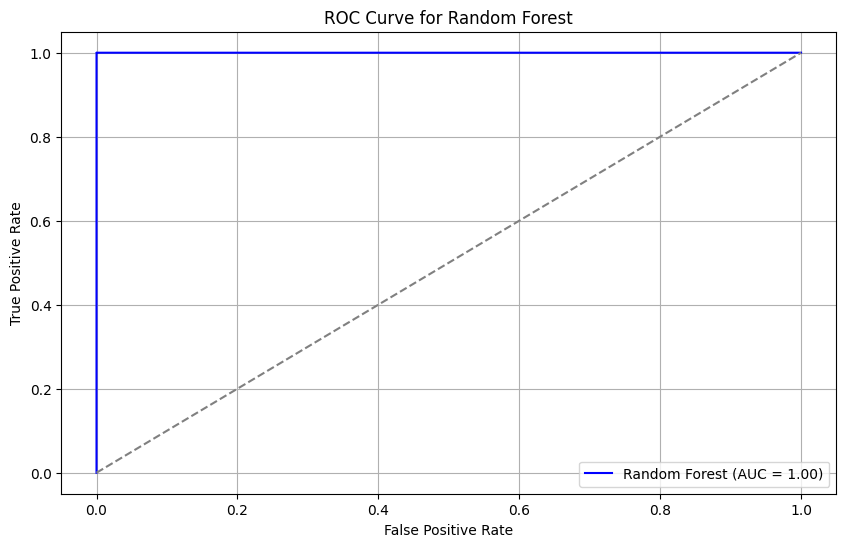

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probabilities from the trained Random Forest model
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
